# KMeans Clustering analysis

### Normalization - Minmax scaler 
### Standardization - Standard scaler




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
infile = pd.read_csv(r'C:\Users\Mohanraj\Python practice Ydealogy\datasets\reclasstoday\ClusterData.csv')

## CLustering without MINMAX scaler

In [2]:
kmmod = KMeans(n_clusters=3)
kmmod.fit(infile)
clusterno = kmmod.labels_
clusterno


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [3]:
infile2 = infile.copy()
infile3 = infile.copy()
infile4 = infile.copy()
infile2['ClusterNo'] = clusterno

In [4]:

'''
Check the below pivot table
1, The algortham has grouped based on its range.
2, Daily steps has good range between each groups but not remaining fields
3, In age field, from 18 to 42 is a group which not apporiprate range and others field 
4, Seems the algorithm done most of range difrences in Dailysteps only 

To make every 
'''
infile2.pivot_table(index='ClusterNo',aggfunc='mean')


,DailySteps,age,height,weight
ClusterNo,,,,
0,2996.142857,40.571429,173.600000,66.057143
1,7951.694444,42.305556,171.777778,68.222222
2,12399.344828,47.137931,162.103448,74.034483


In [5]:
infile2.head(3)

,age,weight,height,DailySteps,ClusterNo
0,18,40,210,953,0
1,18,42,210,1210,0
2,18,42,209,1457,0


C:\Users\Mohanraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


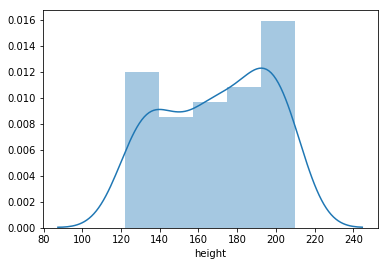

In [6]:
sns.distplot(infile2['height'])

## USing MINMAX scaler (Normalizing data)

In [7]:
scalermod = MinMaxScaler()
scaled_data = scalermod.fit_transform(infile3)
normalizedData = pd.DataFrame(scaled_data)
normalizedData.head()

,0,1,2,3
0,0.000000,0.000000,1.000000,0.023393
1,0.000000,0.033333,1.000000,0.041447
2,0.000000,0.033333,0.988636,0.058799
3,0.019231,0.033333,0.988636,0.305444
4,0.038462,0.050000,0.988636,0.360590


C:\Users\Mohanraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


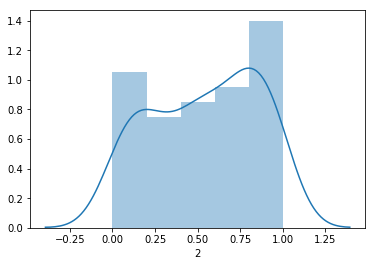

In [12]:
sns.distplot(normalizedData[2
                           ])

## USing Standard scaler (Standardize data)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(infile4)

In [10]:
standaredData = pd.DataFrame(data_scaled)
standaredData.head()

,0,1,2,3
0,-1.747824,-1.684809,1.481528,-1.644257
1,-1.747824,-1.569213,1.481528,-1.579782
2,-1.747824,-1.569213,1.444848,-1.517816
3,-1.678190,-1.569213,1.444848,-0.636991
4,-1.608556,-1.511416,1.444848,-0.440054


C:\Users\Mohanraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


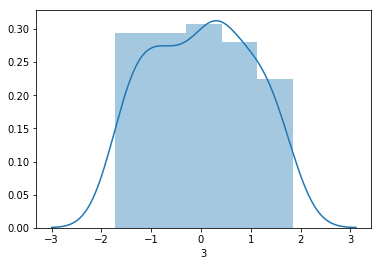

In [11]:
sns.distplot(standaredData[3])